<a href="https://colab.research.google.com/github/gouthamkallempudi/googletechdevguide/blob/master/Lesson10_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#Multi-Class Classification

import keras
keras.__version__

'2.2.4'

In [0]:
from keras.datasets import reuters
(train_data , train_labels) , (test_data , test_labels) = reuters.load_data(num_words = 10000)

In [25]:
train_data.shape

(8982,)

In [26]:
test_data.shape

(2246,)

In [0]:
import numpy as np

def vectorize_sequences(sequences , dimensions = 10000):
  results = np.zeros((len(sequences) , dimensions))
  for i , sequence in enumerate(sequences):
    results[i , sequence] = 1
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(sequences , dimensions = 46):
  results = np.zeros((len(sequences) , dimensions))
  for i , sequence in enumerate(sequences):
    results[i , sequence] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [29]:
one_hot_train_labels.shape

(8982, 46)

In [0]:
#keras also has inbuild library to convert y_labels to categorical

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer = "rmsprop" , loss="categorical_crossentropy" , metrics = ["accuracy"])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 179us/step - loss: 2.5180 - acc: 0.4959 - val_loss: 1.7181 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 152us/step - loss: 1.4426 - acc: 0.6885 - val_loss: 1.3489 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 154us/step - loss: 1.0951 - acc: 0.7650 - val_loss: 1.1719 - val_acc: 0.7410
Epoch 4/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.8698 - acc: 0.8167 - val_loss: 1.0839 - val_acc: 0.7570
Epoch 5/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.7034 - acc: 0.8487 - val_loss: 0.9864 - val_acc: 0.7810
Epoch 6/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.5674 - acc: 0.8805 - val_loss: 0.9412 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.4621 - acc: 0.9048 - val_loss: 0.9121 - val_acc: 0.8030


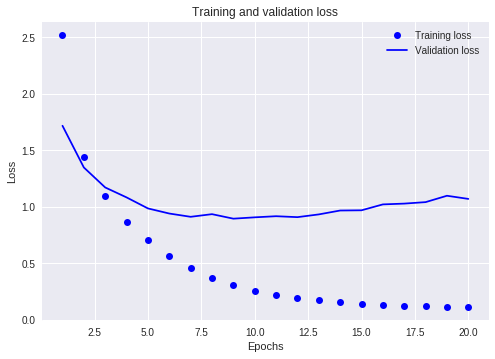

In [35]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

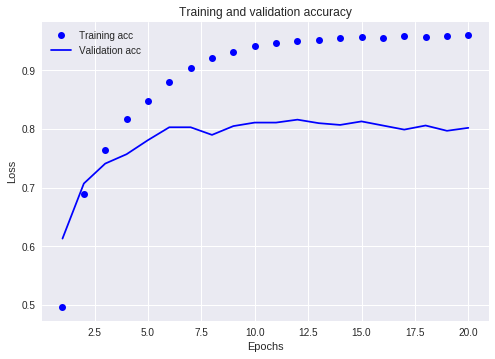

In [36]:
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 187us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/8
7982/7982 [==============================] - 1s 151us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/8
7982/7982 [==============================] - 1s 153us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/8
7982/7982 [==============================] - 1s 154us/step - loss: 0.7975 - acc: 0.8251 - val_loss: 1.0535 - val_acc: 0.7600
Epoch 5/8
7982/7982 [==============================] - 1s 152us/step - loss: 0.6392 - acc: 0.8626 - val_loss: 0.9752 - val_acc: 0.7920
Epoch 6/8
7982/7982 [==============================] - 1s 154us/step - loss: 0.5123 - acc: 0.8921 - val_loss: 0.9101 - val_acc: 0.8120
Epoch 7/8
7982/7982 [==============================] - 1s 160us/step - loss: 0.4128 - acc: 0.9137 - val_loss: 0.8930 - val_acc: 0.8210
Epoch 8

In [38]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 124us/step


[0.9840861292471338, 0.7836153161175423]

In [0]:
predictions = model.predict(x_test)

In [41]:
predictions[0].shape

(46,)

In [42]:
predictions[0]

array([2.5649791e-05, 6.3359308e-05, 6.7228961e-05, 6.9614738e-01,
       2.8286117e-01, 2.4561902e-07, 1.3804449e-04, 6.5681626e-05,
       8.4959120e-03, 1.0517692e-05, 4.7832684e-05, 2.9262691e-03,
       3.6250567e-05, 1.8994935e-04, 6.1602314e-06, 2.5945834e-05,
       9.6718397e-04, 5.6257867e-04, 4.8135623e-04, 1.0656189e-03,
       1.7441234e-03, 5.2823726e-04, 7.8771773e-06, 3.3743196e-04,
       1.3844825e-05, 2.3534195e-04, 9.6458716e-06, 3.8621336e-05,
       1.6356249e-05, 1.6471405e-04, 7.6040853e-04, 5.2960223e-04,
       2.0577487e-05, 3.1911666e-05, 8.0298414e-05, 3.2035161e-05,
       7.0744929e-05, 5.9669241e-05, 9.4338495e-05, 3.9073965e-04,
       7.2006012e-05, 4.7930315e-04, 2.6470225e-06, 7.5115931e-05,
       8.1385806e-06, 1.1940166e-05], dtype=float32)

In [43]:
np.argmax(predictions[0])

3

In [0]:
# Second Method
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
#The only thing it would change is the choice of the loss function. Our previous loss, categorical_crossentropy, 
#expects the labels to follow a categorical encoding. With integer labels, we should use sparse_categorical_crossentropy

#model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

